# Testing of ANN models for combustion

Simple tests for the generated ANN models are made possible on python. These include:

+ Test on 0D ignition simulations
+ Test on the prediction of reaction rate of stationary 1D flames (*a priori* testing)

In [1]:
from ai_reacting_flows.ann_model_generation.model_testing import ModelTesting

2023-01-05 15:26:10.351330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 15:26:10.477971: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-05 15:26:10.481788: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /soft/irsrvsoft1/expl/eb/rocky_8/software/Compiler/GCC/10.3.0/OpenMPI/4.1.1/lib:/soft/irsrvsof

In [2]:
%load_ext autoreload
%autoreload 2

Parameters for the testing:

In [3]:
# Dictionary with parameters
testing_parameters = {}

testing_parameters["models_folder"] = "./MODEL_LOG_RESAMPLED_3Z_SEED2022_SMALL"     # Folder for the ML model
 
testing_parameters["fuel"] = "H2"            # Considered fuel
testing_parameters["with_N_chemistry"] = False         # Nitrogen chemistry considered or not

testing_parameters["spec_to_plot"] = ["N2", "H2", "O2", "H2O", "H2O2"]          # List of species to plot
testing_parameters["pv_species"] = ["H2O"]            # Species used for progress variable computation

testing_parameters["yk_renormalization"] = False

testing_parameters["hybrid_ann_cvode"] = False             # CVODE helping ANN based on a conservation criterion
testing_parameters["hybrid_ann_cvode_tol"] = 5.0e-05      # Tolerance for the CVODE switching


The model testing is first initialized:

In [4]:
test = ModelTesting(testing_parameters)

>> 3 models were found
   >> Clustering method progvar is used 


 ----------CLUSTER MODEL 0---------- 

Model: "main_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 9)]               0         
                                                                 
 dense_layer_1 (Dense)       (None, 5)                 50        
                                                                 
 dense_layer_2 (Dense)       (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 8)                 48        
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________

 ----------CLUSTER MODEL 1---------- 

Model: "main_model"
_________________________

2023-01-05 15:26:22.952836: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-05 15:26:22.953175: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /soft/irsrvsoft1/expl/eb/rocky_8/software/Compiler/GCC/10.3.0/OpenMPI/4.1.1/lib:/soft/irsrvsoft1/expl/eb/rocky_8/software/Compiler/GCCcore/10.3.0/PMIx/3.2.3/lib:/soft/irsrvsoft1/expl/eb/rocky_8/software/Compiler/GCCcore/10.3.0/libfabric/1.12.1/lib:/soft/irsrvsoft1/expl/eb/rocky_8/software/Compiler/GCCcore/10.3.0/UCX/1.10.0/lib:/soft/irsrvsoft1/expl/eb/rocky_8/software/Compiler/GCCcore/10.3.0/libevent/2.1.12/lib:/soft/irsrvsoft1/expl/eb/rocky_8/software/Compiler/GCCcore/10.3.0/hwloc/2.4.1/lib:/soft/irs

We can test the ability of the ANN model to reproduce the ignition of a homogeneous 0-D mixture. The mixture initial state is defined by its temperature $T_0$, its pressure $p$ and its equivalence ratio $\phi$. The simulation is here advanced in time using (i) the CVODE algorithm from CANTERA; (ii) the ANN model.

Current point in cluster: 0 

1/1 [==============================] - 0s 94ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid f

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 47ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid f


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid f

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid f

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 2 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid f


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 31ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 24ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid f

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 22ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 25ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step

Error on equilibrium flame temperature is: 0.9915571022369514 % 


 NUMBER OF CALLS TO SOLVERS:
   >>> Number of ANN calls: 1000
   >>> Number of CVODE calls: 0


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/ai_reacting_flows/ann_model_generation/model_testing.py:351: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs3[0,0].set_ylim([atomic_cons[0,0]*ratio_scale_down,atomic_cons[0,0]*ratio_scale_up])


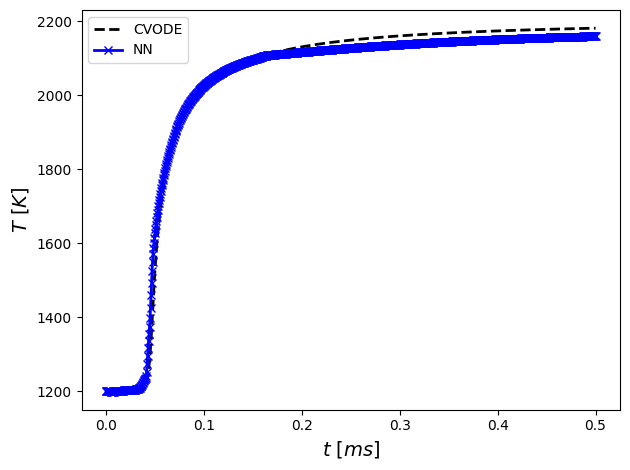

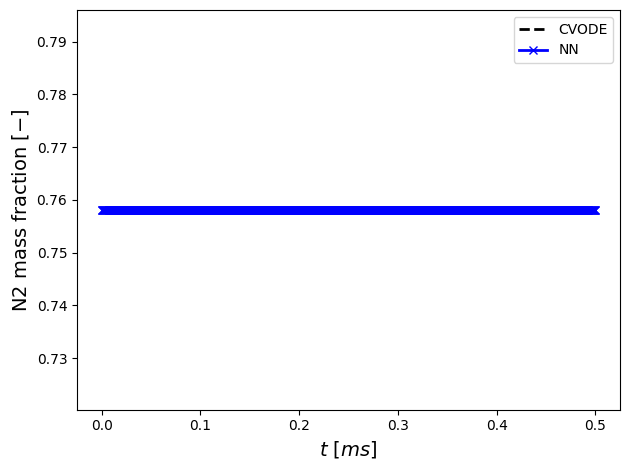

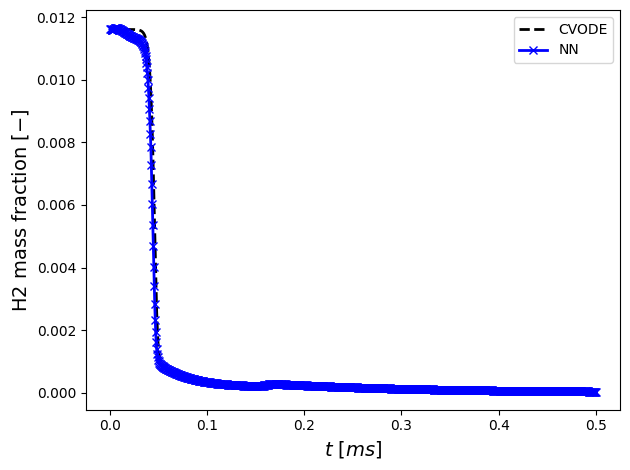

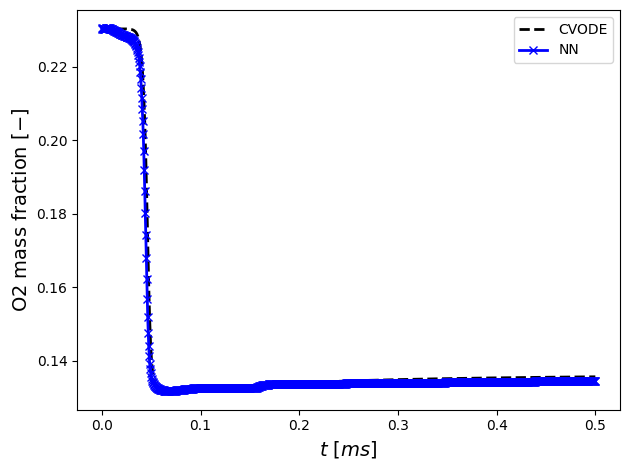

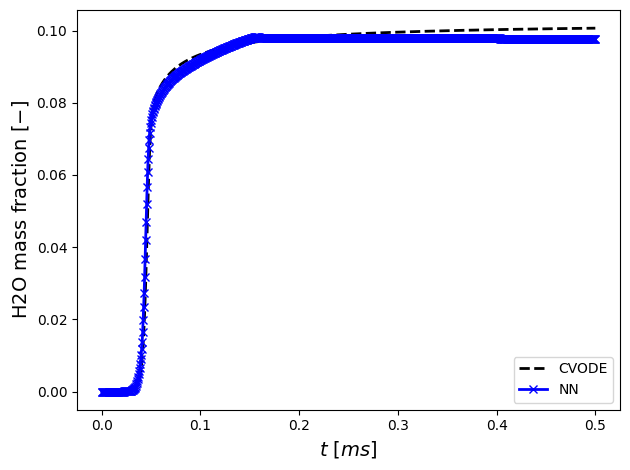

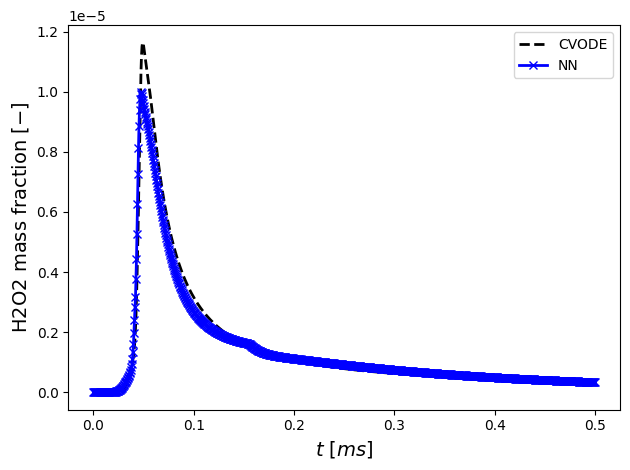

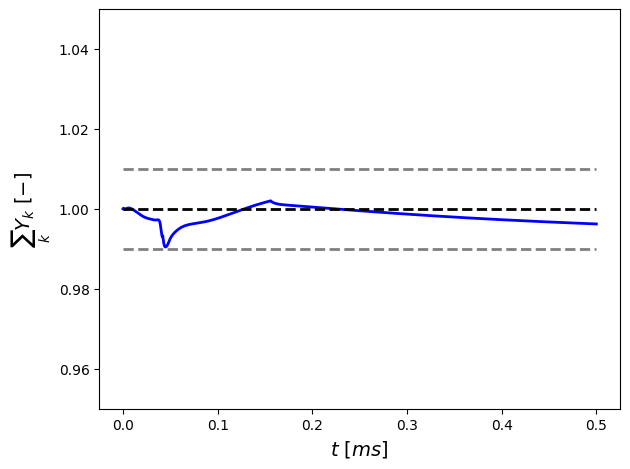

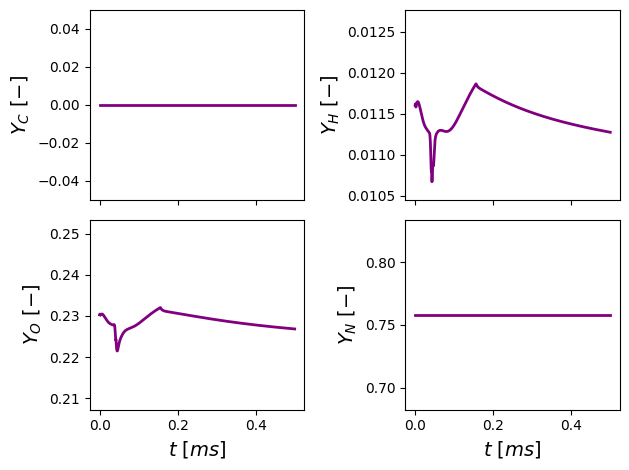

In [5]:
phi = 0.4
T0 = 1200.0
pressure = 101325.0
dt = 0.5e-6
nb_ite = 1000

test.test_0D_ignition(phi, T0, pressure, dt, nb_ite)

Another test, if the ANN has been built for that, is to assess its ability to reproduce laminar premixed flames. The test here is *a priori*, in the sense that we take a CANTERA converged solution, and compare the exact reaction rate to the ANN reaction rate. For a species $k$, if the exact solution is written $Y_k$, the local reaction rate is estimated as:

$$ \dot{\omega}_k = \frac{Y_k(dt) - Y_k}{dt} $$

where $Y_k(dt)$ is the solution $Y_k$ advanced by a time increment $dt$, estimated using either CVODE or ANN.

Computing Cantera 1D flame with T0 = 300.0 K and phi = 0.4
Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current poi

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 22ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 22ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 21ms/step

 NUMBER OF CALLS TO SOLVERS:
   >>> Number of ANN calls: 101
   >>> Number of CVODE calls: 0


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/env_ia/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


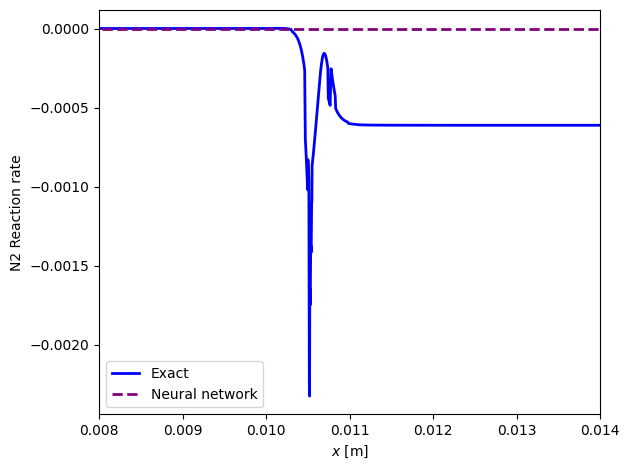

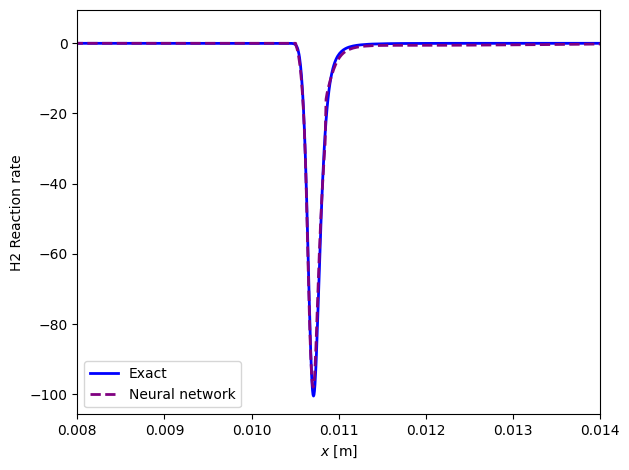

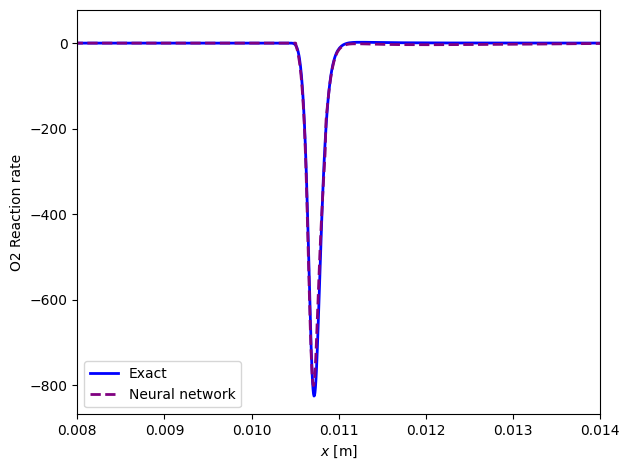

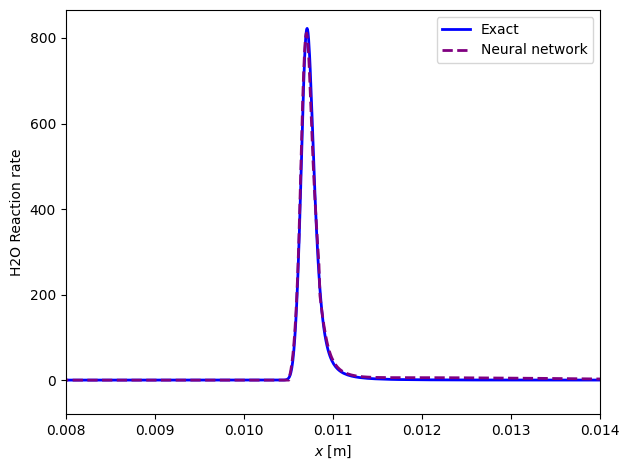

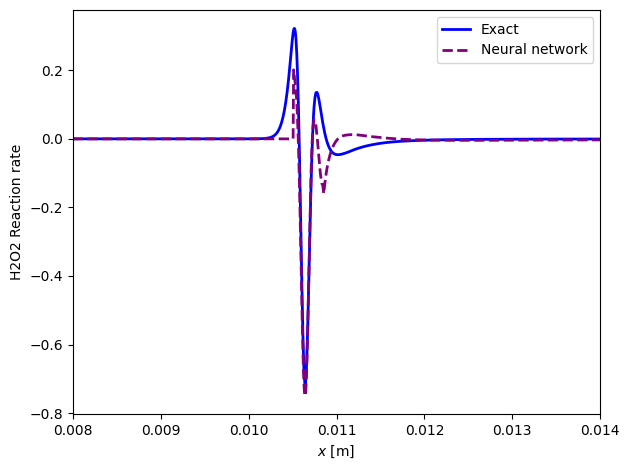

In [45]:
phi = 0.4
T0 = 300.0
pressure = 101325.0
dt = 0.5e-6
T_threshold = 600.0

test.test_1D_premixed(phi, T0, pressure, dt, T_threshold)